# [COVID-19] - Data visualization and Analysis.

Covid-19, also known as coronavirus, is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was primally identified in December 2019 in Wuhan, China and has spread globally, resulting in an ongoing pandemic (Wikipedia). This notebook shows the impact caused by covid around the world and brings a brief study in Brazil.


---

#### Last time executed:

In [7]:
import datetime as dt
print(dt.datetime.now())

2020-05-20 23:40:04.097014


Libraries:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

Data obtained from Johns Hopkins University.<br> 
Source: https://github.com/CSSEGISandData/COVID-19

In [9]:
df_confirmed_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/C" +
                                 "OVID-19/master/csse_covid_19_data/csse_covid_19_ti" +
                                 "me_series/time_series_covid19_confirmed_global.csv")
df_recovered_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVI" +
                                 "D-19/master/csse_covid_19_data/csse_covid_19_time_ser" +
                                 "ies/time_series_covid19_recovered_global.csv")
df_death_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/" +
                             "master/csse_covid_19_data/csse_covid_19_time_series/time_s" +
                             "eries_covid19_deaths_global.csv")

In [10]:
df_confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,868,872,876,880,898,916,933,946,948,949
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,755,755,758,760,761,761,761,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,45,45,45,45,48,48,48,48,50,52


In [11]:
df_recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,558,558,610,648,691,745,745,778,801,850
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,650,654,682,688,694,705,714,715,727,742
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2678,2841,2998,3058,3158,3271,3409,3507,3625,3746
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,550,550,568,576,596,604,615,617,624,628
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,13,13,13,14,14,17,17,17,17,17


In [12]:
df_death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,120,122,127,132,136,153,168,169,173,178
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,502,507,515,522,529,536,542,548,555,561
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,48,48,48,49,49,49,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,3,3


In [13]:
start_date = '1/22/20'
# Needed because of daily updates on database which cannot be updated yet
# where the date of "today" has not been updated.
# So, for practicity, we get one day before. We could get the last column as well.
end_date = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%-m/%d/%y')

In [14]:
df_top10 = df_confirmed_cases.groupby(['Country/Region']).sum()
df_top10 = df_top10.loc[:, start_date:end_date]
df_top10 = df_top10.sort_values(by=[end_date]).tail(10)

In [15]:
df_top10

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Iran,0,0,0,0,0,0,0,0,0,0,...,107603,109286,110767,112725,114533,116635,118392,120198,122492,124603
Turkey,0,0,0,0,0,0,0,0,0,0,...,138657,139771,141475,143114,144749,146457,148067,149435,150593,151615
Germany,0,0,0,0,0,1,4,4,4,5,...,171879,172576,173171,174098,174478,175233,175752,176369,176551,177778
France,0,0,2,3,3,3,4,5,5,5,...,177094,177547,178349,178184,178994,179630,179630,179693,180051,180933
Italy,0,0,0,0,0,0,0,0,0,2,...,219070,219814,221216,222104,223096,223885,224760,225435,225886,226699
Spain,0,0,0,0,0,0,0,0,0,0,...,224350,227436,228030,228691,229540,230183,230698,230698,231606,232037
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,220449,224332,227741,230985,234440,238004,241461,244995,247709,250138
Brazil,0,0,0,0,0,0,0,0,0,0,...,162699,169594,178214,190137,203165,220291,233511,241080,255368,271885
Russia,0,0,0,0,0,0,0,0,0,2,...,209688,221344,232243,242271,252245,262843,272043,281752,290678,299941


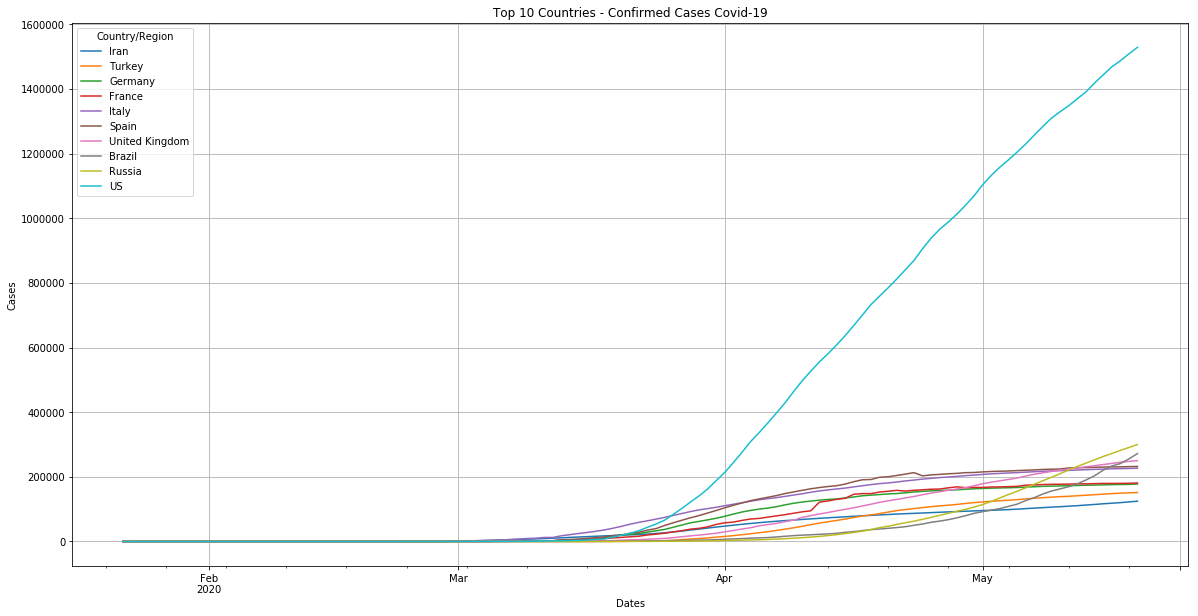

In [16]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1,1,1)
df_top10 = df_top10.T
df_top10.index = pd.to_datetime(df_top10.index)
df_top10.plot(ax=ax, legend=True)
ax.set_title("Top 10 Countries - Confirmed Cases Covid-19", fontsize=12)
ax.grid(True)
ax.set(xlabel='Dates', ylabel="Cases");

Extracting data about recovered cases from Top 10 Countries Confimed Cases by name.

In [17]:
top10_countries = df_top10.columns.tolist() # Name of countries inside top 10
# Searching recovered cases with the top10 countries name.
df_recovered = df_recovered_cases.loc[df_recovered_cases['Country/Region'].isin(top10_countries)]
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.loc[:, start_date:end_date]
df_recovered = df_recovered.sort_values(by=[end_date]).tail(10)

In [18]:
df_recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,1002,1015,1023,1032,1043,1047,1058,1058,1090,1099
France,0,0,0,0,0,0,0,0,0,0,...,56327,56835,57898,58786,59719,60562,60562,61327,61843,62678
Russia,0,0,0,0,0,0,0,0,0,0,...,34306,39801,43512,48003,53530,58226,63166,67373,70209,76130
Iran,0,0,0,0,0,0,0,0,0,0,...,86143,87422,88357,89428,90539,91836,93147,94464,95661,97173
Brazil,0,0,0,0,0,0,0,0,0,0,...,64957,67384,72597,78424,79479,84970,89672,94122,100459,106794
Turkey,0,0,0,0,0,0,0,0,0,0,...,92691,95780,98889,101715,104030,106133,108137,109962,111577,112895
Italy,0,0,0,0,0,0,0,0,0,0,...,105186,106587,109039,112541,115288,120205,122810,125176,127326,129401
Spain,0,0,0,0,0,0,0,0,0,0,...,136166,137139,138980,140823,143374,144783,146446,146446,150376,150376
Germany,0,0,0,0,0,0,0,0,0,0,...,144400,145617,147200,148700,150300,151597,152600,154011,155041,155681


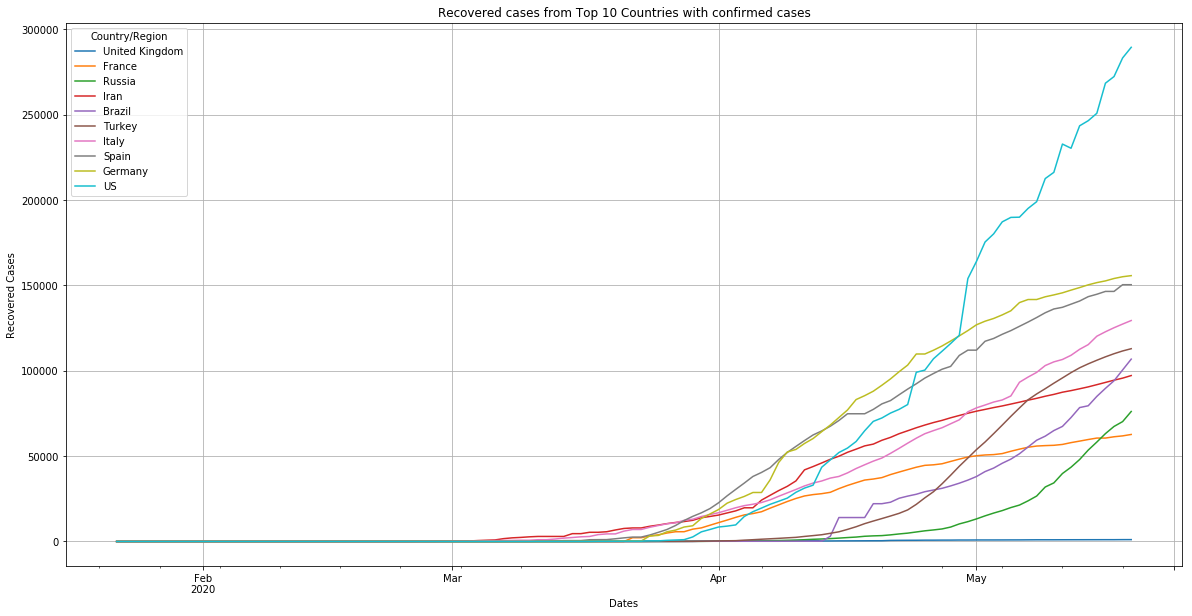

In [19]:
fig = plt.figure(figsize = (20, 10))
ax_2 = fig.add_subplot(1,1,1)
df_recovered = df_recovered.T
df_recovered.index = pd.to_datetime(df_recovered.index)
df_recovered.plot(ax=ax_2, legend=True)
ax_2.set_title("Recovered cases from Top 10 Countries with confirmed cases", fontsize=12)
ax_2.grid(True)
ax_2.set(xlabel='Dates', ylabel='Recovered Cases');

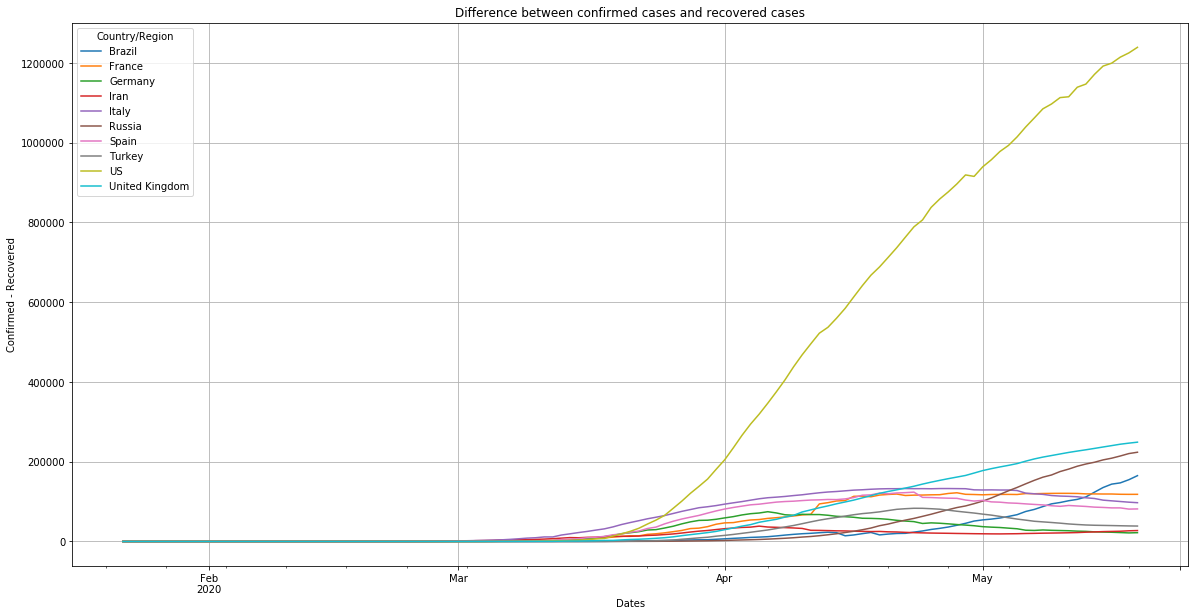

In [20]:
fig = plt.figure(figsize = (20, 10))
ax_3 = fig.add_subplot(1,1,1)
df_diff = df_top10 - df_recovered
df_diff.plot(ax=ax_3, legend=True)
ax_3.set_title("Difference between confirmed cases and recovered cases", fontsize=12)
ax_3.grid(True)
ax_3.set(xlabel='Dates', ylabel='Confirmed - Recovered');

In [21]:
df_death = df_death_cases.loc[df_death_cases['Country/Region'].isin(top10_countries)]
df_death = df_death.groupby(['Country/Region']).sum()
df_death = df_death.loc[:, start_date:end_date]
df_death = df_death.sort_values(by=[end_date]).tail(10)

In [22]:
df_death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Russia,0,0,0,0,0,0,0,0,0,0,...,1915,2009,2116,2212,2305,2418,2537,2631,2722,2837
Turkey,0,0,0,0,0,0,0,0,0,0,...,3786,3841,3894,3952,4007,4055,4096,4140,4171,4199
Iran,0,0,0,0,0,0,0,0,0,0,...,6640,6685,6733,6783,6854,6902,6937,6988,7057,7119
Germany,0,0,0,0,0,0,0,0,0,0,...,7569,7661,7738,7861,7884,7897,7938,7962,8003,8081
Brazil,0,0,0,0,0,0,0,0,0,0,...,11123,11653,12461,13240,13999,14962,15662,16118,16853,17983
Spain,0,0,0,0,0,0,0,0,0,0,...,26621,26744,26920,27104,27321,27459,27563,27563,27709,27778
France,0,0,0,0,0,0,0,0,0,0,...,26383,26646,26994,27077,27428,27532,27532,28111,28242,28025
Italy,0,0,0,0,0,0,0,0,0,0,...,30560,30739,30911,31106,31368,31610,31763,31908,32007,32169
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,31930,32141,32769,33264,33693,34078,34546,34716,34876,35422


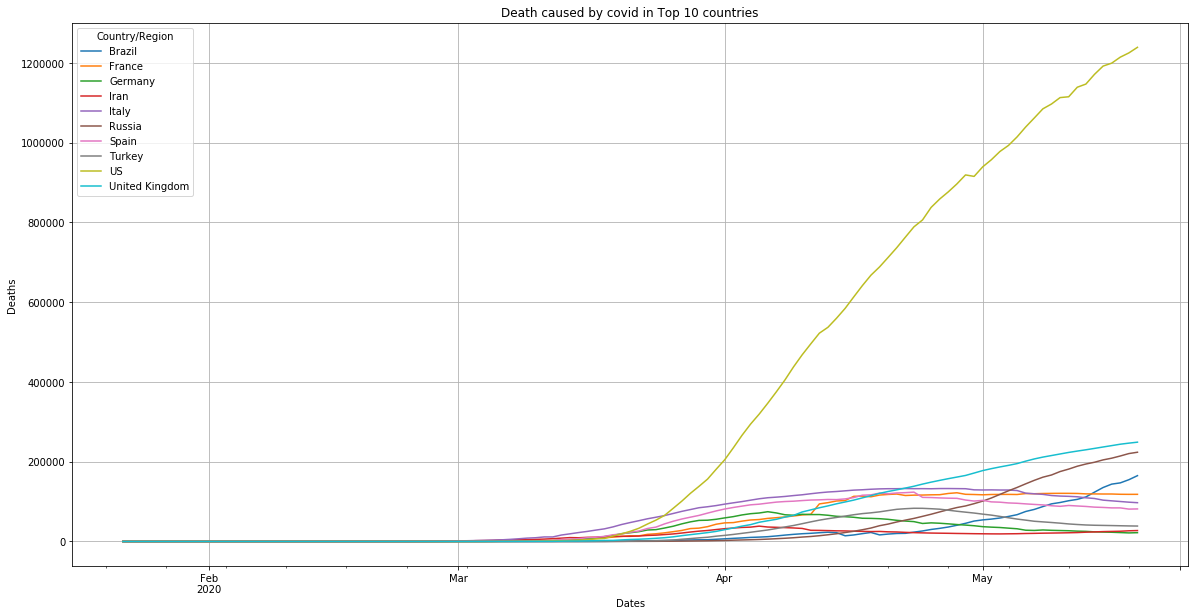

In [23]:
fig = plt.figure(figsize = (20, 10))
ax_4 = fig.add_subplot(1,1,1)
df_diff.plot(ax=ax_4, legend=True)
ax_4.set_title("Death caused by covid in Top 10 countries", fontsize=12)
ax_4.grid(True)
ax_4.set(xlabel='Dates', ylabel='Deaths');

Active cases = (Confirmed Cases - (Recovered + Deaths))

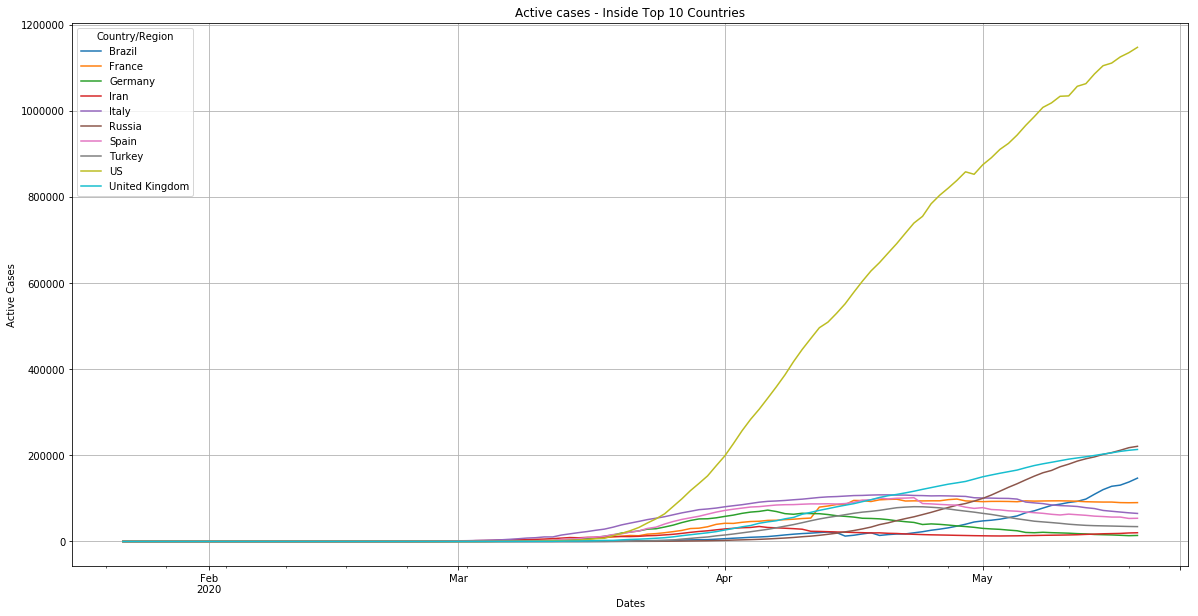

In [24]:
fig = plt.figure(figsize = (20, 10))
ax_5 = fig.add_subplot(1,1,1)
df_death = df_death.T
df_death.index = pd.to_datetime(df_death.index)
df_active = (df_top10 - (df_recovered + df_death))
df_active.plot(ax=ax_5, legend=True)
ax_5.set_title("Active cases - Inside Top 10 Countries", fontsize=12)
ax_5.grid(True)
ax_5.set(xlabel='Dates', ylabel='Active Cases');

#### Starting Brazil study


In [25]:
df_brazil_confirmed = df_confirmed_cases.loc[df_confirmed_cases['Country/Region'].isin(['Brazil'])]

In [26]:
df_brazil_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,162699,169594,178214,190137,203165,220291,233511,241080,255368,271885


In [27]:
df_brazil_recovered = df_recovered_cases.loc[df_recovered_cases['Country/Region'].isin(['Brazil'])]

In [28]:
df_brazil_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
29,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,64957,67384,72597,78424,79479,84970,89672,94122,100459,106794


In [29]:
df_brazil_deaths = df_death_cases.loc[df_death_cases['Country/Region'].isin(['Brazil'])]

In [30]:
df_brazil_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,11123,11653,12461,13240,13999,14962,15662,16118,16853,17983


In [31]:
df_brazil_confirmed = df_brazil_confirmed.loc[:,start_date:end_date].T
df_brazil_confirmed.index = pd.to_datetime(df_brazil_confirmed.index)

df_brazil_recovered = df_brazil_recovered.loc[:,start_date:end_date].T
df_brazil_recovered.index = pd.to_datetime(df_brazil_recovered.index)

df_brazil_deaths = df_brazil_deaths.loc[:,start_date:end_date].T
df_brazil_deaths.index = pd.to_datetime(df_brazil_deaths.index)

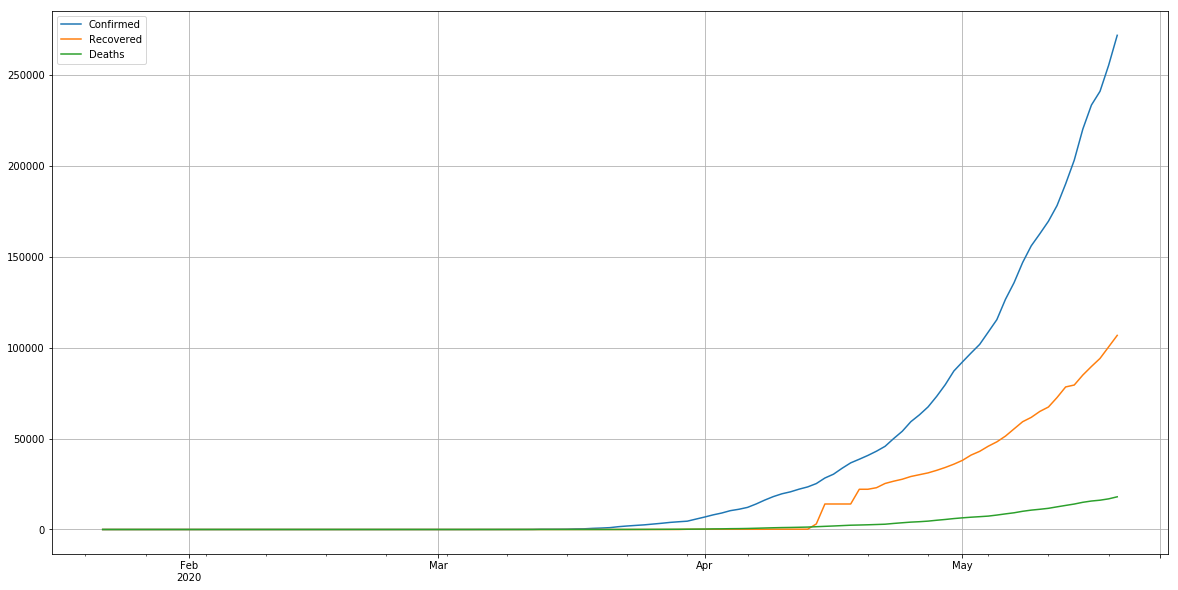

In [35]:
fig = plt.figure(figsize = (20, 10))
ax_6 = fig.add_subplot(1,1,1)
legend_name = ['Confirmed', 'Recovered', 'Deaths']
df_brazil_confirmed.plot(ax=ax_6, legend=True)
df_brazil_recovered.plot(ax=ax_6, legend=True)
df_brazil_deaths.plot(ax=ax_6, legend=True)
ax_6.legend(legend_name)
ax_6.grid(True)